# Plot bonus

### On mac os

In [3]:
import matplotlib.pyplot as plt
import os
import numpy as np
import ast
import seaborn as sns

In [49]:
color = ['#046582', '#6E7582', '#BB8082', '#F39189']
color = ['#74BDCB', '#FFA384', '#B99095', '#3D5B59', '#A30B37'] # AAF683

In [66]:

benchmarks = {}
for ele in os.listdir('./results/'):
    if ele.endswith('.txt'):
        benchmarks[ele.split('.')[0]] = []

# in: benchmarks
# out: {'Windows_4_luglio': [], 'Linux_4_luglio_2': [], 'Linux_4_luglio': []}

def clean_dict(tex):
    tex = tex[0:-1] # dropping '\n'
    # print(tex)
    ex_d = ast.literal_eval(tex)

    for ele in ['relative_error', 'memory_peak']:
        ex_d[ele] = float('.'.join(ex_d[ele].split(',')))

    for ele in ['read_times', 'solve_times']:
        final = []
        for num in ex_d[ele].split(';'):
            final.append(float('.'.join(num.split(','))))
        ex_d[ele] = final
    
    return ex_d



for ele in benchmarks:
    with open('./results/' + ele + '.txt') as f:
        lines = f.readlines()
        for line in lines:
            benchmarks[ele].append(clean_dict(line))

benchmarks.keys()

dict_keys(['Windows_4_luglio', 'MacOS_', 'Linux_4_luglio_2', 'Linux_4_luglio', 'MatlabWindows_', 'MatlabLinux_'])

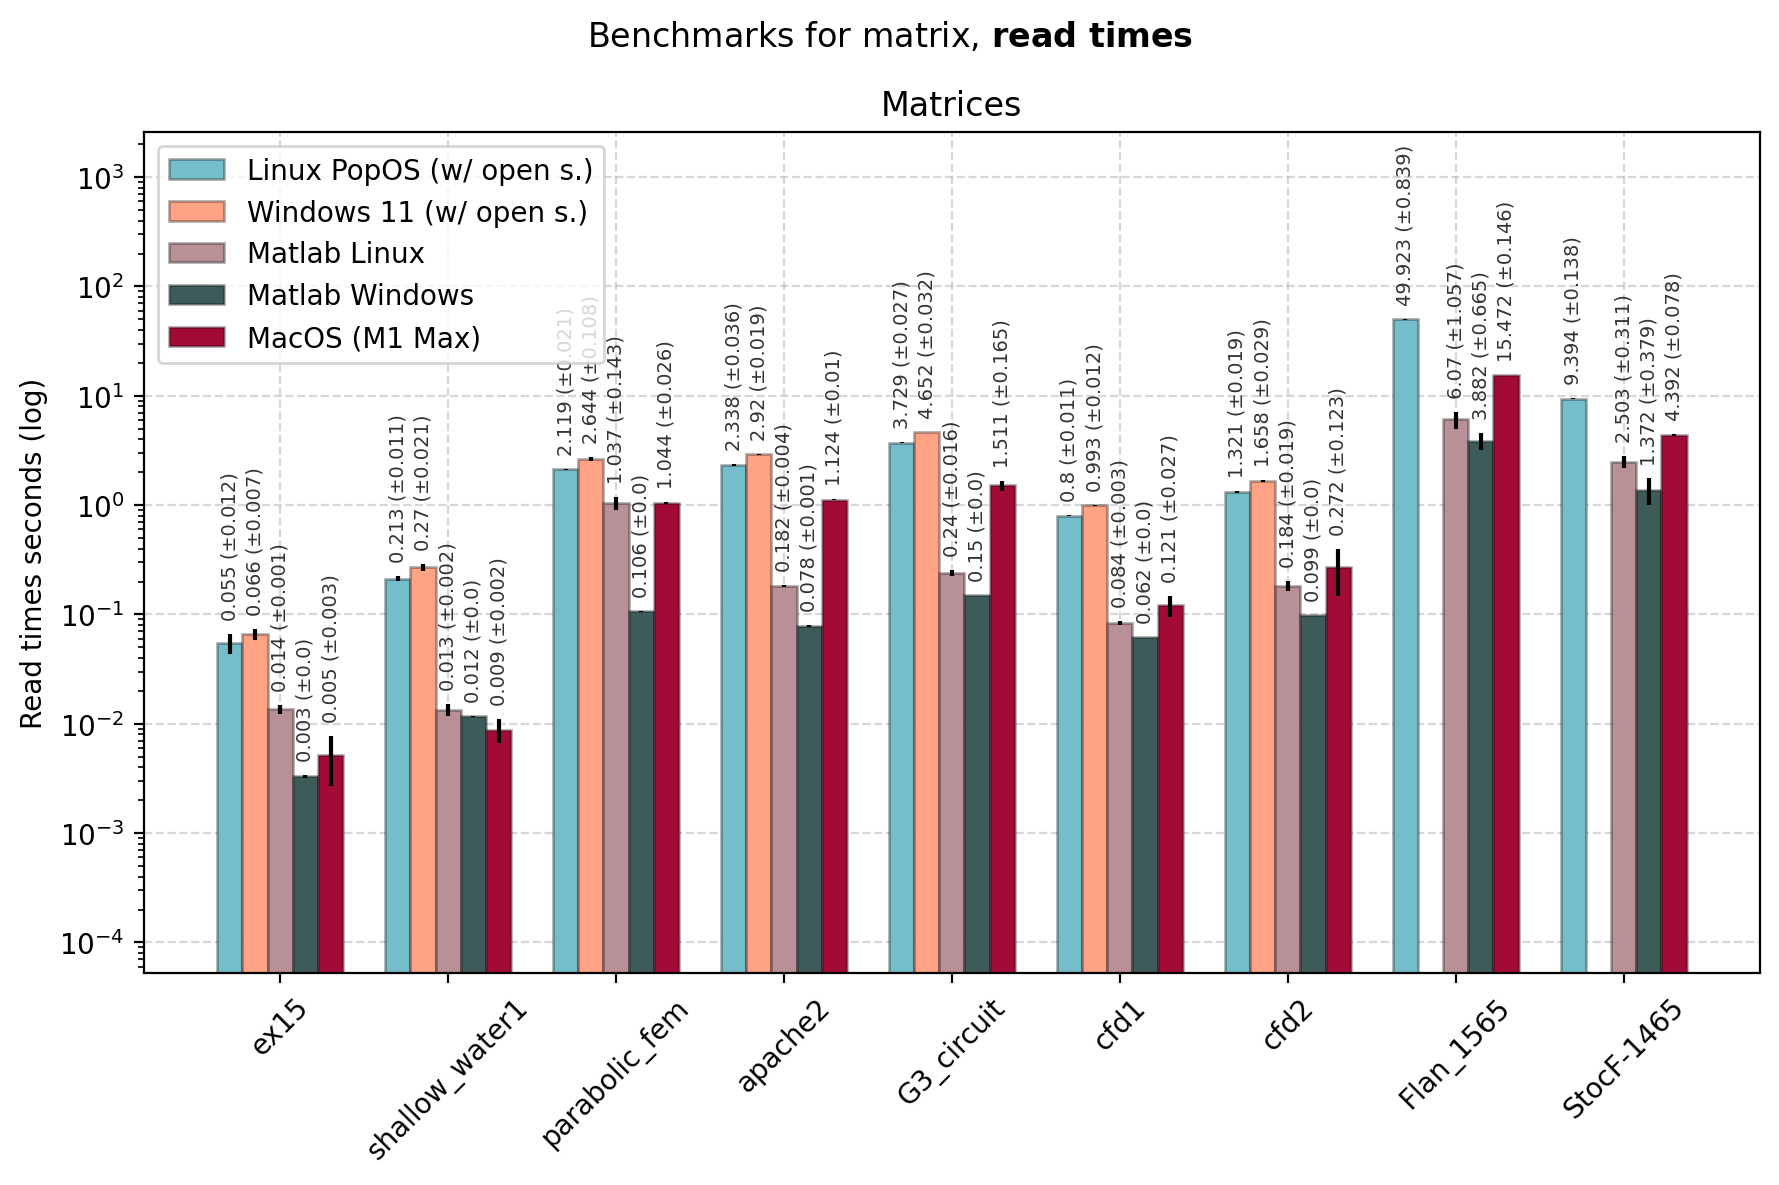

In [70]:
fig, ax = plt.subplots(figsize=(9, 6), dpi = 200)
fig.suptitle(f'Benchmarks for matrix, ' + r"$\bf{read\ times}$")

matrices_names = []
matrixx = {'linux': [], 'windows': [], 'mat_linux': [], 'mat_windows': [], 'mac': []}

for matrixL, matrixW, matrixML, matrixMW, matrixMAC in zip(benchmarks['Linux_4_luglio_2'], benchmarks['Windows_4_luglio'], benchmarks['MatlabWindows_'], benchmarks['MatlabLinux_'], benchmarks['MacOS_']):
    matrices_names.append(matrixL['matrix'].split('.')[0])

    matrixx['linux'].append(matrixL['read_times'])
    matrixx['windows'].append(matrixW['read_times'])
    matrixx['mat_linux'].append(matrixML['read_times'])
    matrixx['mat_windows'].append(matrixMW['read_times'])
    matrixx['mac'].append(matrixMAC['read_times'])


ax.set_yscale('log')
x = np.arange(len(matrices_names))  # the label locations
width = 0.15  # the width of the bars

rects1 = ax.bar(x - width/2 - 1.5 * width, 
    [np.mean(ele) for ele in matrixx['linux']], 
    yerr = [np.std(ele) for ele in matrixx['linux']], 
    # hatch = '/', 
    edgecolor='#00000050',
    width = width, label='Linux PopOS (w/ open s.)', color = color[0]
)
rects2 = ax.bar(x - width/2 - 1/2 * width, 
    [np.mean(ele) for ele in matrixx['windows']], 
    yerr = [np.std(ele) for ele in matrixx['windows']], 
    # hatch = '/', 
    edgecolor='#00000050',
    width = width, label='Windows 11 (w/ open s.)', color = color[1]
)
rects3 = ax.bar(x, 
    [np.mean(ele) for ele in matrixx['mat_linux']], 
    yerr = [np.std(ele) for ele in matrixx['mat_linux']], 
    # hatch = '-', 
    edgecolor='#00000050',
    width = width, label='Matlab Linux', color = color[2]
)
rects4 = ax.bar(x + width/2 + 1/2 * width, 
    [np.mean(ele) for ele in matrixx['mat_windows']], 
    yerr = [np.std(ele) for ele in matrixx['mat_windows']], 
    # hatch = '-', 
    edgecolor='#00000050',
    width = width, label='Matlab Windows', color = color[3]
)
rects5 = ax.bar(x + width/2 + 1.5 * width, 
    [np.mean(ele) for ele in matrixx['mac']], 
    yerr = [np.std(ele) for ele in matrixx['mac']], 
    # hatch = '-', 
    edgecolor='#00000050',
    width = width, label='MacOS (M1 Max)', color = color[4]
)

ax.set_ylabel('Read times seconds (log)')
ax.set_title('Matrices')
ax.set_xticks(x, matrices_names, rotation = 45)

ax.bar_label(rects1, 
    labels = [f'{str(round(np.mean(ele), 3))} (±{str(round(np.std(ele), 3))})' for ele in matrixx['linux']], 
    padding = 5, rotation = '90', alpha = 0.8, fontsize = 7, label_type='edge', color = 'black'
)
ax.bar_label(rects2, 
    labels = [f'{str(round(np.mean(ele), 3))} (±{str(round(np.std(ele), 3))})' for ele in matrixx['windows']], 
    padding = 5, rotation = '90', alpha = 0.8, fontsize = 7, label_type='edge', color = 'black'
)
ax.bar_label(rects3, 
    labels = [f'{str(round(np.mean(ele), 3))} (±{str(round(np.std(ele), 3))})' for ele in matrixx['mat_linux']], 
    padding = 5, rotation = '90', alpha = 0.8, fontsize = 7, label_type='edge', color = 'black'
)
ax.bar_label(rects4,
    labels = [f'{str(round(np.mean(ele), 3))} (±{str(round(np.std(ele), 3))})' for ele in matrixx['mat_windows']], 
    padding = 5, rotation = '90', alpha = 0.8, fontsize = 7, label_type='edge', color = 'black'
)
ax.bar_label(rects5, 
    labels = [f'{str(round(np.mean(ele), 3))} (±{str(round(np.std(ele), 3))})' for ele in matrixx['mac']], 
    padding = 5, rotation = '90', alpha = 0.8, fontsize = 7, label_type='edge', color = 'black'
)

ax.grid(linestyle='--', alpha = 0.5)
ax.set_axisbelow(True)
ax.margins(y=0.4) # adds a % (y) vertical margin on both ends of the y axis scale
ax.legend()
plt.tight_layout()
plt.savefig('images/extra/recap_read_w_mac.png')
plt.show()

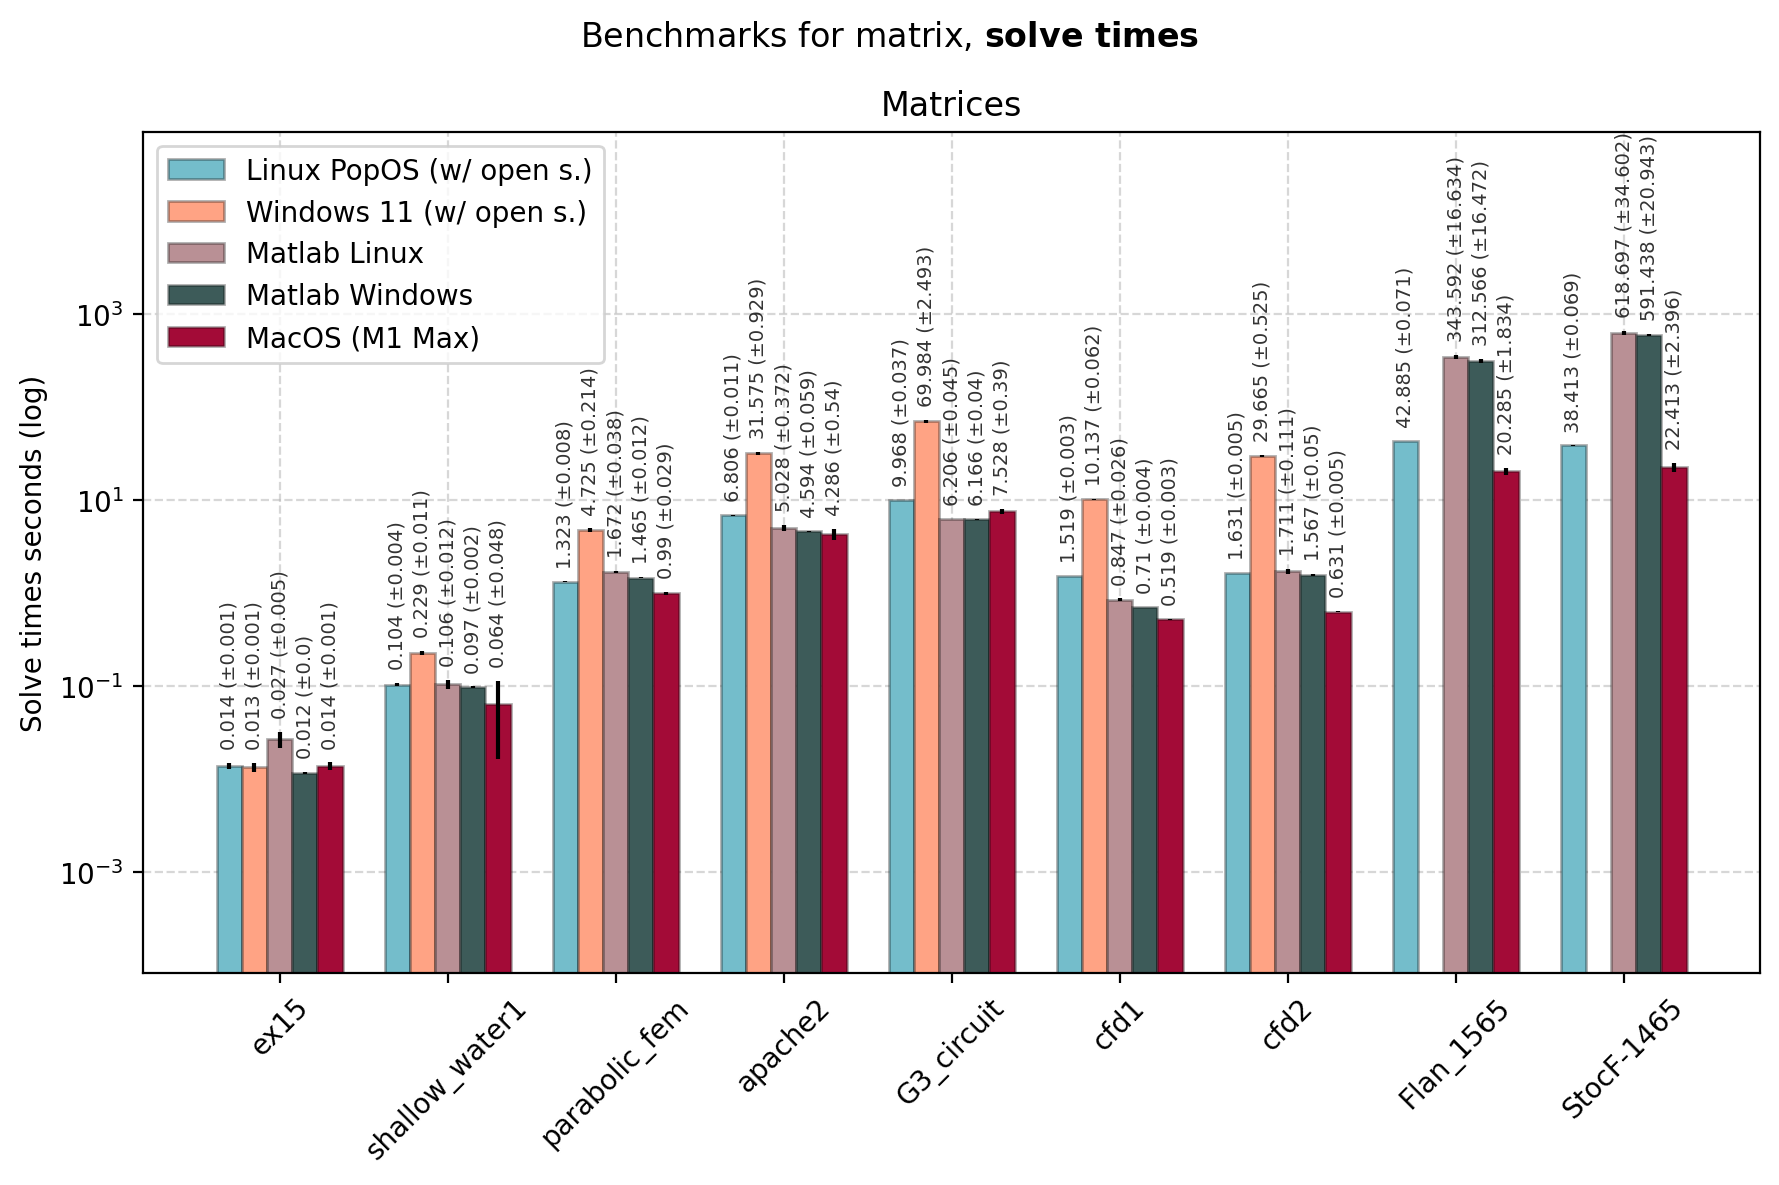

In [72]:
fig, ax = plt.subplots(figsize=(9, 6), dpi = 200)
fig.suptitle(f'Benchmarks for matrix, ' + r"$\bf{solve\ times}$")

matrices_names = []
matrixx = {'linux': [], 'windows': [], 'mat_linux': [], 'mat_windows': [], 'mac': []}

for matrixL, matrixW, matrixML, matrixMW, matrixMAC in zip(benchmarks['Linux_4_luglio_2'], benchmarks['Windows_4_luglio'], benchmarks['MatlabWindows_'], benchmarks['MatlabLinux_'], benchmarks['MacOS_']):
    matrices_names.append(matrixL['matrix'].split('.')[0])

    matrixx['linux'].append(matrixL['solve_times'])
    matrixx['windows'].append(matrixW['solve_times'])
    matrixx['mat_linux'].append(matrixML['solve_times'])
    matrixx['mat_windows'].append(matrixMW['solve_times'])
    matrixx['mac'].append(matrixMAC['solve_times'])


ax.set_yscale('log')
x = np.arange(len(matrices_names))  # the label locations
width = 0.15  # the width of the bars

rects1 = ax.bar(x - width/2 - 1.5 * width, 
    [np.mean(ele) for ele in matrixx['linux']], 
    yerr = [np.std(ele) for ele in matrixx['linux']], 
    # hatch = '/', 
    edgecolor='#00000050',
    width = width, label='Linux PopOS (w/ open s.)', color = color[0]
)
rects2 = ax.bar(x - width/2 - 1/2 * width, 
    [np.mean(ele) for ele in matrixx['windows']], 
    yerr = [np.std(ele) for ele in matrixx['windows']], 
    # hatch = '/', 
    edgecolor='#00000050',
    width = width, label='Windows 11 (w/ open s.)', color = color[1]
)
rects3 = ax.bar(x, 
    [np.mean(ele) for ele in matrixx['mat_linux']], 
    yerr = [np.std(ele) for ele in matrixx['mat_linux']], 
    # hatch = '-', 
    edgecolor='#00000050',
    width = width, label='Matlab Linux', color = color[2]
)
rects4 = ax.bar(x + width/2 + 1/2 * width, 
    [np.mean(ele) for ele in matrixx['mat_windows']], 
    yerr = [np.std(ele) for ele in matrixx['mat_windows']], 
    # hatch = '-', 
    edgecolor='#00000050',
    width = width, label='Matlab Windows', color = color[3]
)
rects5 = ax.bar(x + width/2 + 1.5 * width, 
    [np.mean(ele) for ele in matrixx['mac']], 
    yerr = [np.std(ele) for ele in matrixx['mac']], 
    # hatch = '-', 
    edgecolor='#00000050',
    width = width, label='MacOS (M1 Max)', color = color[4]
)

ax.set_ylabel('Solve times seconds (log)')
ax.set_title('Matrices')
ax.set_xticks(x, matrices_names, rotation = 45)

ax.bar_label(rects1, 
    labels = [f'{str(round(np.mean(ele), 3))} (±{str(round(np.std(ele), 3))})' for ele in matrixx['linux']], 
    padding = 5, rotation = '90', alpha = 0.8, fontsize = 7, label_type='edge', color = 'black'
)
ax.bar_label(rects2, 
    labels = [f'{str(round(np.mean(ele), 3))} (±{str(round(np.std(ele), 3))})' for ele in matrixx['windows']], 
    padding = 5, rotation = '90', alpha = 0.8, fontsize = 7, label_type='edge', color = 'black'
)
ax.bar_label(rects3, 
    labels = [f'{str(round(np.mean(ele), 3))} (±{str(round(np.std(ele), 3))})' for ele in matrixx['mat_linux']], 
    padding = 5, rotation = '90', alpha = 0.8, fontsize = 7, label_type='edge', color = 'black'
)
ax.bar_label(rects4,
    labels = [f'{str(round(np.mean(ele), 3))} (±{str(round(np.std(ele), 3))})' for ele in matrixx['mat_windows']], 
    padding = 5, rotation = '90', alpha = 0.8, fontsize = 7, label_type='edge', color = 'black'
)
ax.bar_label(rects5, 
    labels = [f'{str(round(np.mean(ele), 3))} (±{str(round(np.std(ele), 3))})' for ele in matrixx['mac']], 
    padding = 5, rotation = '90', alpha = 0.8, fontsize = 7, label_type='edge', color = 'black'
)

ax.grid(linestyle='--', alpha = 0.5)
ax.set_axisbelow(True)
ax.margins(y=0.45) # adds a % (y) vertical margin on both ends of the y axis scale
ax.legend()
plt.tight_layout()
plt.savefig('images/extra/recap_solve_w_mac.png')
plt.show()